In [1]:
from torchvision.transforms import Compose
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.transform = transform
        self.images = []
        self.labels = []
        self.label_to_int = {}
        self.int_to_label = {}
        label_count = 0

        for breed in os.listdir(directory):
            breed_directory = os.path.join(directory, breed)
            if os.path.isdir(breed_directory):
                if breed not in self.label_to_int:
                    self.label_to_int[breed] = label_count
                    self.int_to_label[label_count] = breed
                    label_count += 1
                for image_filename in os.listdir(breed_directory):
                    img_path = os.path.join(breed_directory, image_filename)
                    self.images.append(img_path)
                    self.labels.append(self.label_to_int[breed])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        return img, label

In [ ]:
from torchvision.transforms import ToTensor, Compose, Resize, Normalize
from torch.utils.data import DataLoader

transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = CustomDataset(directory="images", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, num_workers=4, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupère un lot d'images
images_batch, labels_batch = next(iter(dataloader))

# Convertit le lot en un numpy array et le dénormalise
images_batch = images_batch.permute(0, 2, 3, 1).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])

# Sélectionne un index au hasard dans le lot
index = np.random.choice(images_batch.shape[0], size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images_batch[i]
    label = labels_batch[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)  # Pas besoin de .item() ici
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.title('Histogramme')
    
    plt.show()


In [ ]:
from albumentations.pytorch import ToTensorV2
from albumentations import Compose, Resize, Normalize, RandomBrightnessContrast, CLAHE
import cv2
import albumentations as A

# L'égalisation automatique du contraste peut être réalisée avec la transformation CLAHE
# et le non-local means dénoising peut être réalisé avec la transformation GaussNoise
# dans la bibliothèque Albumentations. 

transform = A.Compose([
    A.Resize(224, 224),
    A.CLAHE(),
    A.GaussNoise(),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

class CustomDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.transform = transform
        self.images = []
        self.labels = []

        for breed in os.listdir(directory):
            breed_directory = os.path.join(directory, breed)
            if os.path.isdir(breed_directory):
                for image_filename in os.listdir(breed_directory):
                    img = cv2.imread(os.path.join(breed_directory, image_filename))
                    if img is not None:
                        self.images.append(img)
                        self.labels.append(breed)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']

        return image, label

dataset = CustomDataset(directory="images", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, num_workers=4, shuffle=True)


: 

: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


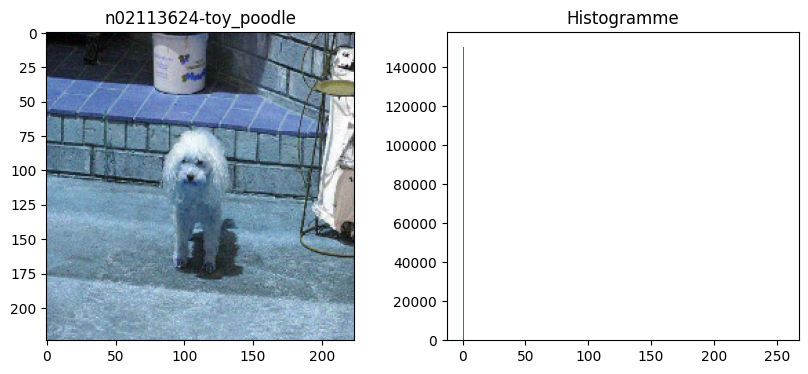

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


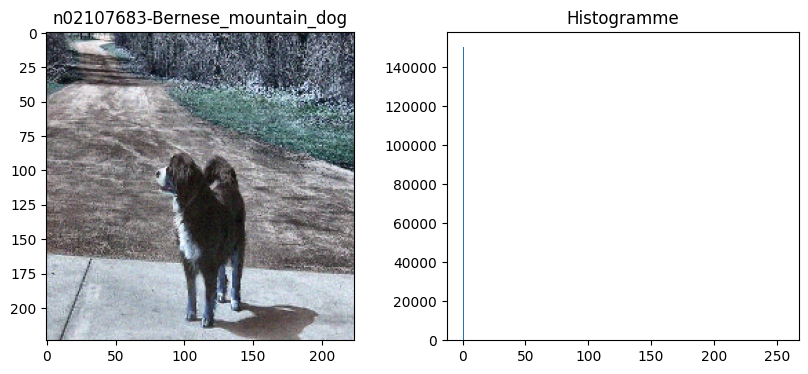

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


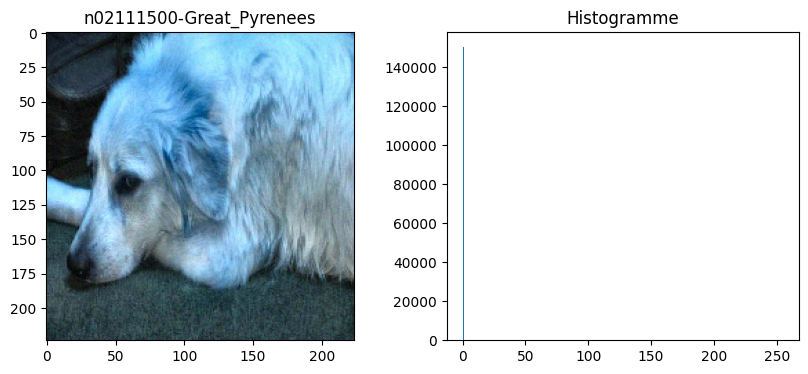

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


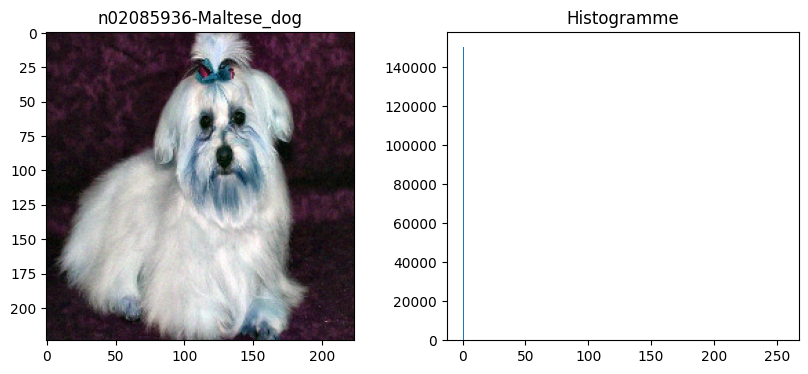

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


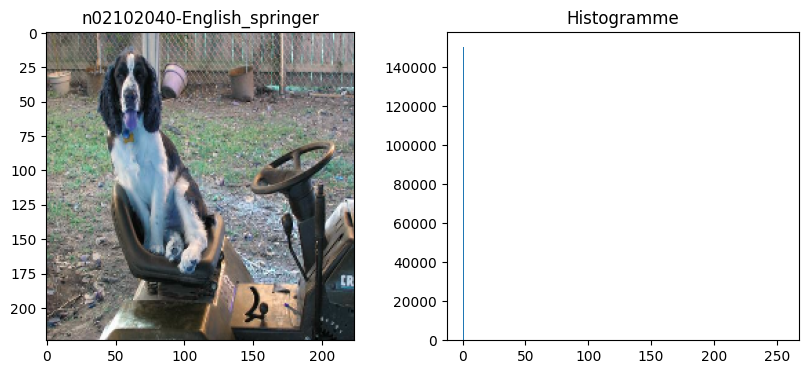

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupère un lot d'images
images_batch, labels_batch = next(iter(dataloader))

# Convertit le lot en un numpy array et le dénormalise
images_batch = images_batch.permute(0, 2, 3, 1).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])

# Sélectionne un index au hasard dans le lot
index = np.random.choice(images_batch.shape[0], size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images_batch[i]
    label = labels_batch[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)  # Pas besoin de .item() ici
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=np.logspace(0,1, 256))
    plt.title('Histogramme')
    
    plt.show()


In [ ]:
import cv2
import torch
from torchvision.transforms import Resize

# Crée un objet de transformation qui redimensionnera les images à la taille spécifiée
transform_resize = Resize((224, 224))

images_resized = []  # Liste pour stocker toutes les images redimensionnées

for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertit l'image en RGB
    img = Image.fromarray(img)  # Convertit l'image en PIL Image
    img_resized = transform_resize(img)  # Redimensionne l'image
    images_resized.append(img_resized)


: 

: 